# 4.2 강남역 맛집 리뷰로 알아보는 감성 분류
- 감성분류 : 긍정 또는 부정의 의견으로 나누어 분류
## Step1. 크롤링 :네이버 플레이스 리뷰 크롤링
- 감성분류에 필요한 데이터 직접 수집
- 네이버 플레이스의 음식점 랭킹 정보를 수집
  - start, display : 검색 결과를 얼마만큼 보여줄지에 관련된 파라미터
  - query : 검색하고 싶은 장소나 음식점에 대한 검색어
  - sortingORder : 어떤 방식으로 검색결과를 정렬할지에 대한 파라미터

### < 관련도순 상위 100개의 고기집 리스트정보 API 구하기

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
import json

# 네이버 플레이스 API를 호출하기 위한 기본 주소입니다.
source_url = "https://store.naver.com/sogum/api/businesses?"

# 검색 규칙 파라미터를 추가합니다.
url_parameter_start = "start=1"
url_parameter_display = "&display="
url_parameter_query = "&query=강남역+고기집"
url_parameter_sorting = "&sortingOrder=precision"
url_concat = source_url + url_parameter_start + \
            url_parameter_display + str(100) + url_parameter_query + url_parameter_sorting

# 반환받은 API 데이터에 json.loads 함수를 사용합니다.
json_data = requests.get(url_concat).text
restaurant_list_data = json.loads(json_data)

# 관련도순 상위 100개의 고기집 리스트 정보를 출력합니다.
print(str(restaurant_list_data)[:100]+"...")

{'query': {'select': '1', 'item': [{'rank': '1', 'region_keyword': '강남역', 'region_type': 'favor', 'r...


### < 크롤링에 필요한 id 정보 추출하기 >

In [3]:
json.loads(json_data)

{'query': {'select': '1',
  'item': [{'rank': '1',
    'region_keyword': '강남역',
    'region_type': 'favor',
    'region_info': {'name': '강남역 2호선',
     'fkey': '2',
     'x': '1270276241',
     'y': '374979526',
     'spot_id': '13479290',
     'bmap': '0',
     'coordinates': {'coordinate': [{'x': '127.0272121', 'y': '37.4926153'},
       {'x': '127.0228532', 'y': '37.5020801'},
       {'x': '127.0292005', 'y': '37.5038361'},
       {'x': '127.0334889', 'y': '37.4946773'},
       {'x': '127.0272796', 'y': '37.4926696'}]}},
    'biz_type': 'category',
    'biz': '고기집',
    'coordinate_mode': '0'},
   {'rank': '2',
    'region_keyword': '',
    'region_type': 'none',
    'region_info': '',
    'biz_type': 'unknown',
    'biz': '강남역 고기집',
    'coordinate_mode': '0'}],
  'type': 'local',
  'petrol': '0',
  'global_menu': '0'},
 'total': 924,
 'items': [{'id': '1670127583',
   'name': '무한야끼',
   'businessCategory': 'restaurant',
   'dbType': 'drt',
   'category': '육류,고기요리',
   'desc': '',


In [4]:
restaurant_id_list = []

# 100개씩의 API 호출 결과를 10번 가져옵니다.
for start_idx in [1, 101, 201, 301, 401, 501, 601, 701, 801, 901]:
    
    # 네이버 플레이스 API를 호출하기 위한 기본 주소입니다.
    source_url = "https://store.naver.com/sogum/api/businesses?"
    
    # 검색 규칙 파라미터를 추가합니다.
    url_parameter_start = "start=" + str(start_idx)
    url_parameter_display = "&display="
    url_parameter_query = "&query=강남역+고기집"
    url_parameter_sorting = "&sortingOrder=precision"
    url_concat = source_url + url_parameter_start + \
                url_parameter_display + str(start_idx+99) + url_parameter_query + url_parameter_sorting
    print("request_url:", url_concat)
    json_data = requests.get(url_concat).text
    restaurant_list_data = json.loads(json_data)

    # 크롤링에 필요한 각 리뷰 상세 페이지의 id를 추출합니다.
    for restaurant in restaurant_list_data['items']:
        if 'moreBookingReviewsPath' in restaurant:
            restaurant_id_list.append(restaurant['id'])

restaurant_id_list = list(set(restaurant_id_list))

request_url: https://store.naver.com/sogum/api/businesses?start=1&display=100&query=강남역+고기집&sortingOrder=precision
request_url: https://store.naver.com/sogum/api/businesses?start=101&display=200&query=강남역+고기집&sortingOrder=precision
request_url: https://store.naver.com/sogum/api/businesses?start=201&display=300&query=강남역+고기집&sortingOrder=precision
request_url: https://store.naver.com/sogum/api/businesses?start=301&display=400&query=강남역+고기집&sortingOrder=precision


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
print(restaurant_id_list)

['1670127583', '985516513', '37577974', '37253680', '1880659013', '19867538', '1299706278', '36952307', '37085684', '37837518', '37486499', '36237506', '1491757857', '11609540', '37362312', '37704319', '35156836', '37001144', '870437247', '1506252365', '37108078', '1030684001', '1716816659', '866289572', '1855774071', '33860503', '37362033', '37128226', '1635991500', '33989451', '1703147169', '1949341145', '1556164339', '1017711866', '19753615', '65051490', '1065087255', '35597794', '1462581328', '1408610224', '1881368157', '1163576863', '509620913', '583881628', '1485719894', '150291462', '35841618', '37592394', '1147208360', '1506238307', '18364648', '1122005130', '13151847', '1900295387', '36413890', '38427620', '1256460481']


### < 가져온 맛집 리스트의 리뷰 정보 크롤링하기>
- 앞서 추출한 id를 이용하여 각 페이지에서 리뷰 데이터와 평점 데이터를 크롤링
- 4점 이상의 리뷰: 긍정리뷰 (1) , 3점 이하의 리뷰 : 부정리뷰(0)

In [6]:
import requests
from bs4 import BeautifulSoup
import re

columns=['score', 'review']
df=pd.DataFrame(columns=columns)

# 리뷰 상세 페이지의 기본주소입니다.
source_url_head = "https://store.naver.com/restaurants/detail?id="
source_url_tail = "&tab=bookingReview#_tab"

for idx in range(0,len(restaurant_id_list)):
    
    # 앞서 추출한 리뷰 상세 페이지의 id를 기본주송의 파라미터로 추가합니다.
    req=requests.get(source_url_head+str(restaurant_id_list[idx])+source_url_tail)
    html=req.content
    soup=BeautifulSoup(html, 'lxml')
    review_area=soup.find(name="div", attrs={"class":"review_area"})
    
    # 리뷰가 없는 페이지는 아무것도 수행하지 않는다.
    if review_area is None:
        continue
    
    # 개발자 도구로 살펴본 html구조에서 리뷰의 점수, 테스트 부분을 추출
    review_list = review_area.find_all(name="div", attrs={"class":"info_area"})
    for review in review_list:
        score = review.find(name="span",attrs={"class":"score"}).text
        review_txt = review.find(name="div", attrs={"class":"review_txt"}).text
        
        # 추출한 리뷰의 점수 리뷰 텍스트를 데이터 프레임으로 병합
        row=[score, review_txt]
        series=pd.Series(row, index=df.columns)
        df=df.append(series, ignore_index=True)

In [8]:
# 4점 이상의 리뷰는 긍정리뷰, 3점 이하의 리뷰는 부정리뷰로 평가

df['y'] = df['score'].apply(lambda x: 1 if float(x) > 3 else 0)
print(df.shape)
df.head(10)

(481, 3)


,score,review,y
0,4.5,"남자친구와 함께, 제 친구 청첩장 주려고 예약해서 만나서 먹었어요! 오마카세로 먹었...",1
1,4,블로그 보고 어제 처음 방문했는데요 처음 방문하시는 분들 특히 금요일 방문하실꺼면 ...,1
2,4.5,연기가 잘 빠지지 않아서 몸에서 냄새가 많이 났어요\n그래도 맛있게 잘 먹었습니다....,1
3,4,연기가빠져나가지않아서\n조금 눈이매움\n직원분들이 매우우친절함\n새로오픈해서인지 아...,1
4,4.5,"고기 엄청맛있구요, 직원분들도 엄청 친절해요!!\n다음에도 소고기생각나면 가야겠어요ㅎ",1
5,5,너무 맛있고 너무 좋았어요 진짜 말이 필요없는 집! 그 어떤 곳들과도 견줄수 없는 ...,1
6,5,무한리필집이라서 눈치볼 필요도 없고 편하고 맛있게 잘 먹고 왔습니다 고기가 정말 맛...,1
7,5,아주 굿굿굿이네여 서비스도 좋고 그무엇보다도 여기 고기가 정말 맛있었습니다 강추강추...,1
8,5,갈때마다 항상 친절하고 음식은 뭐 말이 필요없이 맛있습니다 ㅎㅎㅎ,1
9,5,규모가 엄청 커서 단체로 와도 좋을곳이였어요. 나중에 지인들이랑 한번 와야겠다 싶을...,1


## Step2. 텍스트 전처리 : 분류 모델 피처로 변환하기
### < 한글 텍스트로 전처리하기 >

In [9]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출합니다.
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result=hangul.sub('',text)
    return result

# 함수를 적용하여 리뷰에서 한글만 추출합니다.
df['ko_text'] = df['review'].apply(lambda x:text_cleaning(x))
del df['review']
df.head()

,score,y,ko_text
0,4.5,1,남자친구와 함께 제 친구 청첩장 주려고 예약해서 만나서 먹었어요 오마카세로 먹었는데...
1,4,1,블로그 보고 어제 처음 방문했는데요 처음 방문하시는 분들 특히 금요일 방문하실꺼면 ...
2,4.5,1,연기가 잘 빠지지 않아서 몸에서 냄새가 많이 났어요그래도 맛있게 잘 먹었습니다고기는...
3,4,1,연기가빠져나가지않아서조금 눈이매움직원분들이 매우우친절함새로오픈해서인지 아직 깔끔대신...
4,4.5,1,고기 엄청맛있구요 직원분들도 엄청 친절해요다음에도 소고기생각나면 가야겠어요ㅎ


### < 형태소 단위의 추출 함수 정의하기>
- 형태소/품사 형태로 데이터를 추출 get_pos()함수를 정의


In [10]:
from konlpy.tag import Okt

In [11]:
# konlpy 형태소 분석기로 명사 단위의 키워드를 추출합니다.
def get_pos(x):
    tagger=Okt()
    pos=tagger.pos(x)
    pos=['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트 합니다.
result = get_pos(df['ko_text'][0])
print(result)

['남자친구/Noun', '와/Josa', '함께/Adverb', '제/Noun', '친구/Noun', '청첩장/Noun', '주/Modifier', '려고/Noun', '예약/Noun', '해서/Verb', '만나서/Verb', '먹었어요/Verb', '오/Modifier', '마카/Noun', '세로/Noun', '먹었는데/Verb', '연어/Noun', '육회/Noun', '하고/Josa', '고기/Noun', '들/Suffix', '맛있었어요/Adjective', '엄청/Adverb', '푸/Verb', '짐/Noun', '해서/Verb', '다/Adverb', '먹고/Verb', '났을/Verb', '때/Noun', '배/Noun', '완전/Noun', '부르더라구요/Verb', '근데/Adverb', '그/Noun', '양/Modifier', '곱창/Noun', '그거/Noun', '는/Josa', '그냥/Noun', '그랬고/Adjective', '식사/Noun', '에/Josa', '냉소/Noun', '바랑/Noun', '냉면/Noun', '도/Josa', '무난/Noun', '했는데/Verb', '간장게장/Noun', '밥/Noun', '인가/Josa', '그거/Noun', '는/Josa', '비추에요/Verb', '선택/Noun', '하지/Verb', '마세요/Verb', '후식/Noun', '아이스크림/Noun', '도/Josa', '잊지/Verb', '마세요/Verb', '맛있어요/Adjective', 'ㅋㅋㅋ/KoreanParticle']


#### 텍스트 데이터를 연산가능한 피처로 만드는 방법
- raw 데이터셋 : 데이터 프레임의 텍스트 데이터에 해당합니다.
- 뭉치 : raw 데이터셋으로부터 말뭉치를 생성합니다.
- 학습 데이터 셋 : 해당 단어가 존재하면 벡터의 값을 1로, 없으면 벡터의 값을 0으로 할당

### <분류 모델의 학습데이터로 변환하기 : corpus index 생성>

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# 파이썬에서는 sklearn.feature_extraction.text 라이브러리의 CountVectorizer라는 클래스를 통해 이 작업을 쉽게 수행

# 형태소를 벡터 형태의 학습 데이터(X 데이터)셋으로 변환
index_vectorizer = CountVectorizer(tokenizer =lambda x: get_pos(x))
# CountVectorizer 클래스의 tokenizer 파라미터는 텍스트 데이터의 전처리 방식을 입력
X = index_vectorizer.fit_transform(df['ko_text'].tolist())
# df['ko_text'].tolist()을 입력값으로 fit_transform을 실행하여 학습 데이터셋 생성
print(X.shape)
# 2465개의 피처를 가진 480개 학습데이터셋이 생성되었음

(481, 2468)


### < 분류 모델의 학습 데이터로 변환하기>
- 학습데이터셋과 말뭉치가 올바르게 생성되었는지 확인
    - 첫번째 실행결과
        index_vectorizer.vocabulary_를 출력 (피처 사용에 사용된 말뭉치)
    - 두번째 실행결과
        원래의 텍스트 데이터와 변환 이후의 데이터 함께 출력 

In [13]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'남자친구/Noun': 397, '와/Josa': 1612, '함께/Adverb': 2386, '제/Noun': 1925, '친구/Noun': 2172, '청첩장/Noun': 2..


In [14]:
print(df['ko_text'][0])
print(X[0])

남자친구와 함께 제 친구 청첩장 주려고 예약해서 만나서 먹었어요 오마카세로 먹었는데 연어 육회하고 고기들 맛있었어요 엄청 푸짐해서 다 먹고났을때 배 완전 부르더라구요 근데 그 양곱창 그거는 그냥 그랬고 식사에 냉소바랑 냉면도 무난했는데 간장게장밥인가 그거는 비추에요 선택하지 마세요 후식 아이스크림도 잊지마세요 맛있어요 ㅋㅋㅋ
  (0, 5)	1
  (0, 799)	1
  (0, 1843)	1
  (0, 1392)	1
  (0, 2454)	1
  (0, 713)	2
  (0, 2352)	1
  (0, 1217)	1
  (0, 1139)	1
  (0, 1761)	1
  (0, 1005)	1
  (0, 75)	1
  (0, 2416)	1
  (0, 930)	1
  (0, 565)	2
  (0, 417)	1
  (0, 978)	1
  (0, 419)	1
  (0, 1538)	1
  (0, 1318)	1
  (0, 272)	1
  (0, 267)	1
  (0, 472)	2
  (0, 264)	2
  (0, 192)	1
  :	:
  (0, 2075)	1
  (0, 2292)	1
  (0, 1509)	1
  (0, 809)	1
  (0, 641)	1
  (0, 176)	1
  (0, 2312)	1
  (0, 1686)	1
  (0, 1574)	1
  (0, 860)	1
  (0, 1226)	1
  (0, 724)	1
  (0, 1590)	1
  (0, 867)	1
  (0, 731)	1
  (0, 2401)	2
  (0, 1585)	1
  (0, 692)	1
  (0, 2003)	1
  (0, 2148)	1
  (0, 2172)	1
  (0, 1925)	1
  (0, 2386)	1
  (0, 1612)	1
  (0, 397)	1


- 텍스트에 중복되는 형태소의 경우 같은 데이터로 변환
    - ex) 너무 좋았습니다 , 너무 너무 좋았습니다 의 경우
- TF-IDF
    - 단어 빈도를 나타내는 TF, DF의 역수인 IDF를 곱한 값
    - 1번텍스트에 맛집이 3번 등장, 모든 데이터에서 맛집이 10번 등장
    - 맛집의 TF값은 3, IDF값은 0.1이 됩니다. 
    - 다른 문서들에서는 등장하지 않았지만 현재 문서에서는 많이 등장하는 단어
    - 그 단어가 현재 문서에서 얼마나 중요한지를 피처로 나타낼수 있는 방법

### < 분류 모델의 학습데이터로 변환하기 : TF-IDF로 변환>

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 반환합니다.
tfidf_vectorizer = TfidfTransformer()
X=tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[0])

(481, 2468)
  (0, 397)	0.14435964306397672
  (0, 1612)	0.11990316748202542
  (0, 2386)	0.11990316748202542
  (0, 1925)	0.11087701001222103
  (0, 2172)	0.1239618720384804
  (0, 2148)	0.12892932495182982
  (0, 2003)	0.12892932495182982
  (0, 692)	0.14435964306397672
  (0, 1585)	0.08064349253743021
  (0, 2401)	0.18848617665269585
  (0, 731)	0.14435964306397672
  (0, 867)	0.09310123581418663
  (0, 1590)	0.11087701001222103
  (0, 724)	0.14435964306397672
  (0, 1226)	0.14435964306397672
  (0, 860)	0.10447284936987852
  (0, 1574)	0.14435964306397672
  (0, 1686)	0.11990316748202542
  (0, 2312)	0.08726068105823646
  (0, 176)	0.05302970045053811
  (0, 641)	0.07606096985033949
  (0, 809)	0.07658478798097523
  (0, 1509)	0.098068688727536
  (0, 2292)	0.12892932495182982
  (0, 2075)	0.12892932495182982
  :	:
  (0, 192)	0.09671910926405107
  (0, 264)	0.25785864990365964
  (0, 472)	0.16257758230380837
  (0, 267)	0.10104126356292652
  (0, 272)	0.14435964306397672
  (0, 1318)	0.09424308832634792
  (0, 1

## Step3.분류: 긍정/부정 리뷰 분류하기
### <분류 모델링 : 데이터셋분리>

In [38]:
from sklearn.model_selection import train_test_split

y=df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(336, 2468)
(145, 2468)


### < 분류 모델링: 로지스틱 회귀 모델>

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀 모델을 학습합니다.
lr=LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 로지스틱 회귀 모델의 성능을 평가합니다.
print("Accuracy : %.2f"%accuracy_score(y_test, y_pred))
print("Precision : %.3f"%precision_score(y_test, y_pred))
print("Recall : %.3f"%recall_score(y_test, y_pred))
print("F1 : %.3f"%f1_score(y_test, y_pred))


Accuracy : 0.91
Precision : 0.910
Recall : 1.000
F1 : 0.953


In [40]:
# 분류기의 성능이 비정상적으로 높은 경우 모델의 평가 방법이나 과정을 의심할 필요가 있다.
from sklearn.metrics import confusion_matrix
# Confusion Matrix를 출력합니다.
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[  0  13]
 [  0 132]]


[(0.6000224477710384, 785), (0.4844124913326976, 1981), (0.4832497763983086, 787), (0.48014371035037245, 1854), (0.476011384617978, 865)]
[(-0.6392942729396436, 1038), (-0.6895819862901749, 749), (-0.7345476438313977, 1250), (-0.9323366277375074, 1691), (-1.0232173170346353, 1398)]


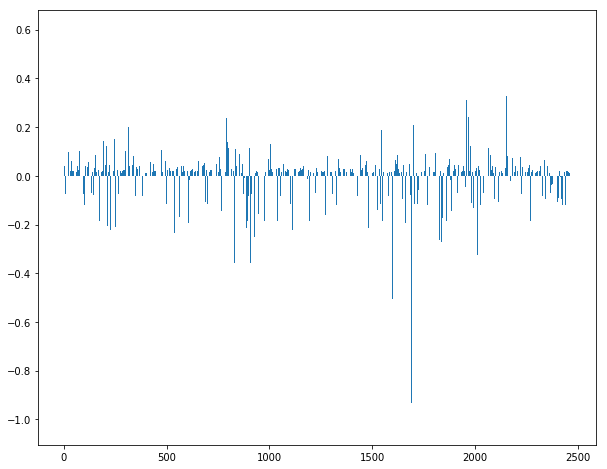

In [41]:
# 회귀 모델의 피처 영향력 추출하기
plt.rcParams['figure.figsize']=[10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
print(sorted(((value, index) for index , value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index , value in enumerate(lr.coef_[0])), reverse=True)[-5:])

In [45]:
# 회귀 모델의 계수를 높은 순으로 정렬합니다.
coef_pos_index =sorted(((value, index)for index, value in enumerate(lr.coef_[0])),reverse=True)

# 회귀 모델의 계수를 index_vectorizer에 맵필하여 어떤 형태소인지 출력할 수 있게 합니다.
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력합니다. 계수가 높은 피처는 리뷰에 긍적적인 영향을 주는 형태소라고 할 수 있습니다.
print(str(invert_index_vectorizer)[:100]+'..')

{397: '남자친구/Noun', 1612: '와/Josa', 2386: '함께/Adverb', 1925: '제/Noun', 2172: '친구/Noun', 2148: '청첩장/No..


In [46]:
# 상위 20개 긍정 형태소 출력하기
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]],coef[0])

맛있게/Adjective 0.6000224477710384
좋았습니다/Adjective 0.4844124913326976
맛있고/Adjective 0.4832497763983086
잘/Verb 0.48014371035037245
먹었습니다/Verb 0.476011384617978
맛있었어요/Adjective 0.4714710485549137
맛있어요/Adjective 0.34601832931753596
님/Suffix 0.3409223617102381
최고/Noun 0.3271811057101556
친절하시고/Adjective 0.3182879767251271
진짜/Noun 0.31431182038484423
좋고/Adjective 0.3124595480512213
매우/Noun 0.3108134000523826
좋은/Adjective 0.3035703159632476
친절하고/Adjective 0.3000481550767937
정말/Noun 0.283536167855267
또/Noun 0.27083120340316325
고기/Noun 0.2679534131559745
직원/Noun 0.2665614082910489
깔끔하고/Adjective 0.26297258852364147


### < 클래스의 불균형 문제 해결하기>
- 적절한 샘플링 방법으로 Positive, Negative 비율의 차이를 동일하게 맞춰주는 방법

In [19]:
# y가 0과 1을 얼마나 가지고 있는지를 출력
df['y'].value_counts()

1    439
0     42
Name: y, dtype: int64

### < 클래스 불균형문제 해결하기 : 1:1 비율의 랜덤 샘플링>
- 클래스를 1:1 비율로 샘플링하기 위해 y가 1인 50개의 샘플, y가 0인 50개의 샘플
- 데이터를 다시 학습 데이터셋과 테스트 데이터셋으로 분리하는 방법을 사용합니다.

In [53]:
# 1:1 비율로 랜덤 샘플링을 수행합니다.
positive_random_idx = df[df['y']==1].sample(50, random_state=30, replace=True).index.tolist()
negative_random_idx = df[df['y']==0].sample(50, random_state=30,replace=True).index.tolist()

In [54]:
print(positive_random_idx)
print(negative_random_idx)

[323, 461, 470, 331, 150, 446, 424, 339, 278, 156, 471, 140, 466, 291, 411, 355, 192, 470, 176, 19, 19, 125, 394, 438, 428, 68, 313, 48, 188, 353, 68, 295, 16, 446, 297, 475, 173, 59, 168, 122, 201, 383, 368, 113, 365, 103, 187, 461, 220, 200]
[418, 418, 174, 258, 52, 231, 53, 478, 98, 45, 380, 232, 232, 441, 174, 209, 97, 290, 12, 162, 207, 258, 412, 178, 354, 310, 290, 181, 464, 162, 348, 418, 162, 453, 146, 354, 453, 412, 254, 464, 263, 66, 478, 265, 265, 181, 290, 234, 345, 311]


In [55]:
# 랜덤 데이터로 데이터셋을 나눕니다.
random_idx = positive_random_idx + negative_random_idx
sample_X = X[random_idx, :]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(sample_X, y, test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(70, 2468)
(30, 2468)


### < 로지스틱 회귀 모델 다시 학습하기>

In [57]:
# 로지스틱 회귀모델을 다시 학습합니다.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 학습한 모델을 테스트 데이터로 평가합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.77
Precision : 0.682
Recall : 1.000
F1 : 0.811


In [58]:
# Confusion matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 8  7]
 [ 0 15]]


## Step4. 분석: 중요 키워드 분석하기
- 어떤 형태소가 높은 영향력을 가지고 있는가

### <회귀 모델의 피처 영향력 추출하기>

[(0.6247975087373491, 865), (0.5763929328725327, 1981), (0.5055465180796985, 1854), (0.4957200662875095, 427), (0.3616141702338444, 787)]
[(-0.3778399362747441, 20), (-0.4539501895068209, 498), (-0.4998850339194939, 1038), (-0.6303791512872995, 1691), (-0.710032007655551, 1398)]


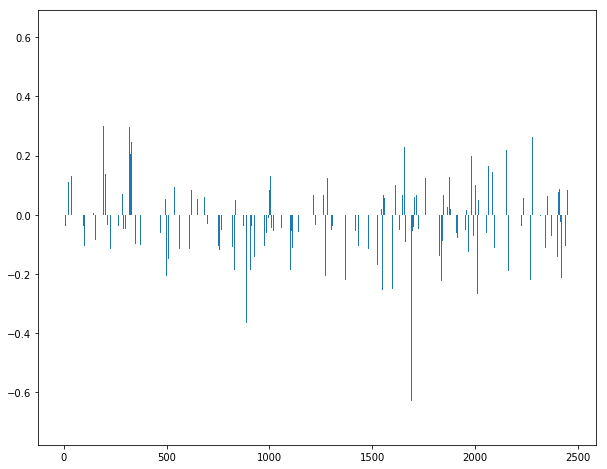

In [59]:
# 학습한 회귀 모델의 계수를 출력합니다.
plt.rcParams['figure.figsize']=[10,8]
plt.bar(range(len(lr.coef_[0])),lr.coef_[0])
print(sorted(((value, index) for index , value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index , value in enumerate(lr.coef_[0])), reverse=True)[-5:])

### <중요 변수의 형태소>
- 긍정 형태소와 부정형태소를 출력하기 위해 형태소를 정렬
- 정렬된 벡터는 index_vectorizer 객체에 다시 결과를 맵핑

In [69]:
# 회귀 모델의 계쑤를 높은 순으로 정렬
coef_pos_index=sorted(((value, index)for index, value in enumerate(lr.coef_[0])), reverse=True)

# 회귀모델의 계수를 idnex_vectorizer에 맵핑하여 어떤 형태소인지 출력 할 수 있게 합니다.
invert_index_vectorizer = {v:k for k, v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력합니다.
# 계수가 높은 피처는 리뷰에 긍정적인 영향을 주는 형태소라고 할 수 있습니다.
print(str(invert_index_vectorizer)[:100]+'..')


{397: '남자친구/Noun', 1612: '와/Josa', 2386: '함께/Adverb', 1925: '제/Noun', 2172: '친구/Noun', 2148: '청첩장/No..


In [70]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

먹었습니다/Verb 0.6247975087373491
좋았습니다/Adjective 0.5763929328725327
잘/Verb 0.5055465180796985
넘/Verb 0.4957200662875095
맛있고/Adjective 0.3616141702338444
맛잇엇어/Noun 0.34112427711889715
매우/Noun 0.31473823848107996
음식/Noun 0.3019560628794182
곳/Noun 0.2981577911860687
맛있게/Adjective 0.29754005583197857
깔끔하게/Adjective 0.29511766814816875
구워져서/Verb 0.29511766814816875
맛있어요/Adjective 0.28708438849850565
수/Noun 0.2843326176408689
좋네요/Adjective 0.27530862944413226
편해요/Adjective 0.26198444065025056
것/Noun 0.26163699356300885
친절하고/Adjective 0.2477575032871785
깨끗하고/Adjective 0.24624135519951346
ㅎㅎ/KoreanParticle 0.24201063598908226


AUC : 0.800


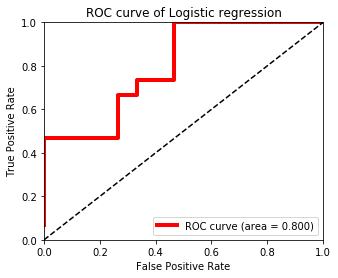

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
# AUC를 계산합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

### <미니퀴즈 4.3>
- 피처 영향력에 따라 정렬된 형태소에서 품사(명사, 동사)별 형태소 10개와 부정 형태소 10개를 탐색
 - "/"로 구분되어있는 정보를 활용하여 품사별 형태소를 추출
 

In [78]:
noun_list=[]
adjective_list=[]
verb_list=[]

for coef in coef_pos_index[:100]:
    pos_category = invert_index_vectorizer[coef[1]].split("/")[1]
    if pos_category=="Noun":
        noun_list.append((invert_index_vectorizer[coef[1]],coef[0]))
    elif pos_category=="Adjective":
        adjective_list.append((invert_index_vectorizer[coef[1]],coef[0]))
    elif pos_category=="Verb":
        verb_list.append((invert_index_vectorizer[coef[1]],coef[0]))

In [82]:
# 상위 10개의 명사를 출력합니다.
noun_list[:10]

[('맛잇엇어/Noun', 0.34112427711889715),
 ('매우/Noun', 0.31473823848107996),
 ('음식/Noun', 0.3019560628794182),
 ('곳/Noun', 0.2981577911860687),
 ('수/Noun', 0.2843326176408689),
 ('것/Noun', 0.26163699356300885),
 ('예약/Noun', 0.22532089377583678),
 ('최고/Noun', 0.21946270271266666),
 ('추천/Noun', 0.2130337666455939),
 ('준수/Noun', 0.20941471608948448)]

In [83]:
adjective_list[:10]

[('좋았습니다/Adjective', 0.5763929328725327),
 ('맛있고/Adjective', 0.3616141702338444),
 ('맛있게/Adjective', 0.29754005583197857),
 ('깔끔하게/Adjective', 0.29511766814816875),
 ('맛있어요/Adjective', 0.28708438849850565),
 ('좋네요/Adjective', 0.27530862944413226),
 ('편해요/Adjective', 0.26198444065025056),
 ('친절하고/Adjective', 0.2477575032871785),
 ('깨끗하고/Adjective', 0.24624135519951346),
 ('우수하고/Adjective', 0.22876402226670103)]

In [84]:
verb_list[:10]

[('먹었습니다/Verb', 0.6247975087373491),
 ('잘/Verb', 0.5055465180796985),
 ('넘/Verb', 0.4957200662875095),
 ('구워져서/Verb', 0.29511766814816875),
 ('먹을/Verb', 0.22666836763752826),
 ('가는/Verb', 0.20734147469357128),
 ('구워주셔서/Verb', 0.19262686923263408),
 ('감사합니다/Verb', 0.17933110757833096),
 ('먹으러/Verb', 0.15305828766585972),
 ('하겠습니다/Verb', 0.14937401246780802)]